In [348]:
import numpy as np
import pandas as pd
from scipy import signal 
import matplotlib.pyplot as plt

In [349]:
# Loading the Data
train_data = np.load('train_data.npy')
test_data = np.load('test_data.npy')

In [350]:
# Turning the data into Dataframe
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

In [351]:
# Change the label column index
train_df['label'] = train_df[10000] 
train_df = train_df.drop(columns=[10000]);
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,-0.065,-0.050,0.000,0.070,0.135,0.160,0.135,0.095,0.025,-0.055,...,-0.060,-0.005,0.060,0.075,0.035,-0.005,-0.045,-0.100,-0.090,0.0
1,0.280,0.225,0.200,0.075,0.030,0.110,0.180,0.165,0.225,0.215,...,-0.255,-0.230,-0.185,-0.150,-0.035,-0.005,-0.030,-0.055,-0.085,0.0
2,1.075,0.960,0.795,0.660,0.570,0.575,0.710,0.860,0.905,1.065,...,0.750,0.780,0.730,0.545,0.335,0.110,-0.115,-0.125,-0.145,0.0
3,0.215,0.240,0.355,0.415,0.450,0.480,0.445,0.440,0.340,0.330,...,-0.640,-0.580,-0.570,-0.525,-0.535,-0.555,-0.610,-0.645,-0.620,1.0
4,-0.150,-0.105,-0.075,-0.060,-0.050,-0.090,-0.080,-0.105,-0.140,-0.150,...,-0.055,-0.050,-0.045,-0.035,0.005,0.020,0.015,0.005,-0.005,1.0


In [352]:
# the function which processes the train data
import preprocessing 

def process_data(df):
    processed_df = pd.DataFrame()
    for i in range (len(df)):
        test = df.iloc[i]
        test_label = int(test['label'])
        test = test[0:len(test)-1]
        # test = preprocessing.filter_signal(test,cutoff = [5,15] , sample_rate= 500 ,order= 6 , filtertype='bandpass')
        test = preprocessing.filter_signal(test,cutoff = .2 , sample_rate= 500 ,order= 2 , filtertype='highpass')
        test = preprocessing.filter_signal(test,cutoff = 20 , sample_rate= 500 ,order= 2 , filtertype='lowpass')
        p_test = pd.Series(test)
        label = pd.Series([test_label], index = ['label'])
        label = pd.to_numeric(label, downcast='integer')
        p_test = p_test.append(label)
        processed_df = processed_df.append(p_test, ignore_index=True)
    return processed_df

In [353]:
# you can see the processed data below
pdata = process_data(train_df)
processed_train_data = pd.DataFrame(pdata)
processed_train_data.tail()


,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
136,-0.073582,-0.079355,-0.084750,-0.089550,-0.093635,-0.096973,-0.099612,-0.101639,-0.103128,-0.104119,...,-0.013845,-0.012582,-0.011377,-0.010257,-0.009346,-0.008807,-0.008770,-0.009244,-0.010066,38.0
137,-0.035270,-0.023470,-0.012138,-0.001803,0.007177,0.014653,0.020644,0.025289,0.028784,0.031339,...,-0.150701,-0.138724,-0.128578,-0.119849,-0.112310,-0.105749,-0.099880,-0.094426,-0.089273,39.0
138,-0.018808,-0.011246,-0.004004,0.002654,0.008524,0.013443,0.017255,0.019823,0.021038,0.020870,...,0.195630,0.193902,0.189612,0.182735,0.173274,0.161337,0.147291,0.131767,0.115602,39.0
139,-0.101981,-0.064838,-0.028345,0.004348,0.030832,0.049847,0.061751,0.068671,0.073690,0.079364,...,0.747402,0.707048,0.663189,0.614955,0.562019,0.504704,0.444007,0.381568,0.319530,40.0
140,-0.127746,-0.014425,0.094426,0.194744,0.283026,0.356651,0.414143,0.455361,0.481794,0.496703,...,-0.597030,-0.597331,-0.587102,-0.566425,-0.536631,-0.499739,-0.458004,-0.413605,-0.368311,40.0


In [354]:
# A function to plot the raw data + processed data

def plot_signal(df, index):

    row = df.iloc[index]
    p_row = processed_train_data.iloc[index]
    signal_label = (row['label'])
    row = row[:len(row) - 1]
    p_row = p_row[:len(p_row) - 1]

    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(20, 8))
    fig.suptitle(f'         Label : {int(signal_label)}')
    ax1.plot(row, color ='black' , linewidth=.5,)
    ax2.plot(p_row, color ='blue' , linewidth=.5)
    ax1.set( title='Raw Data')
    ax2.set( title='Processed Data')
    plt.grid()
    # plt.savefig(f"train_{index}_{signal_label:.0f}.png")
    # plt.close(fig)
    plt.show() 


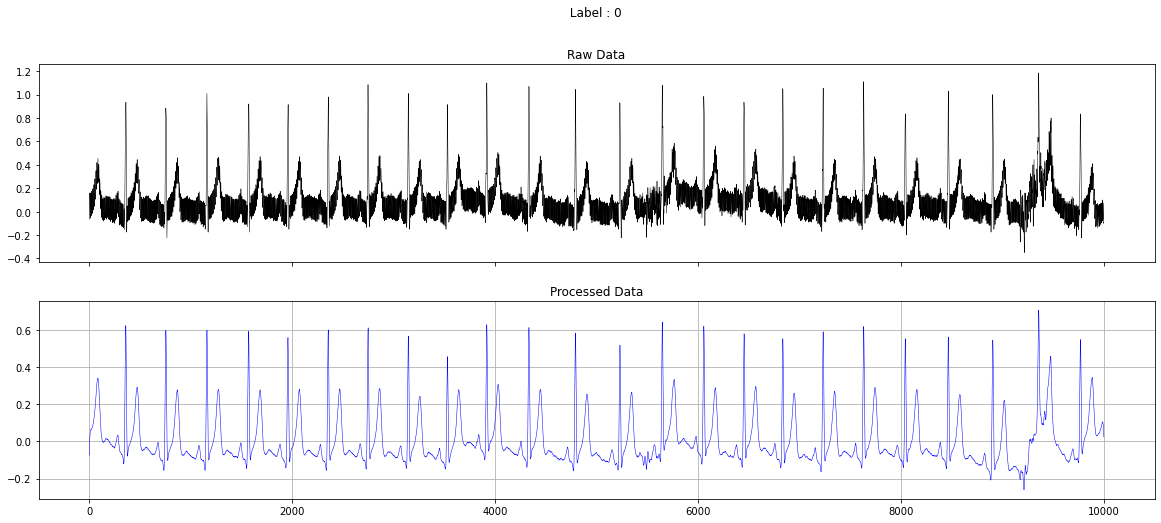

In [355]:
# I tried to save each data as a png file to visualize them and after that, I created a pdf of all (raw + processed) data together to visualize and check them

# for i in range (train_df.shape[0]):
plot_signal(train_df,0)

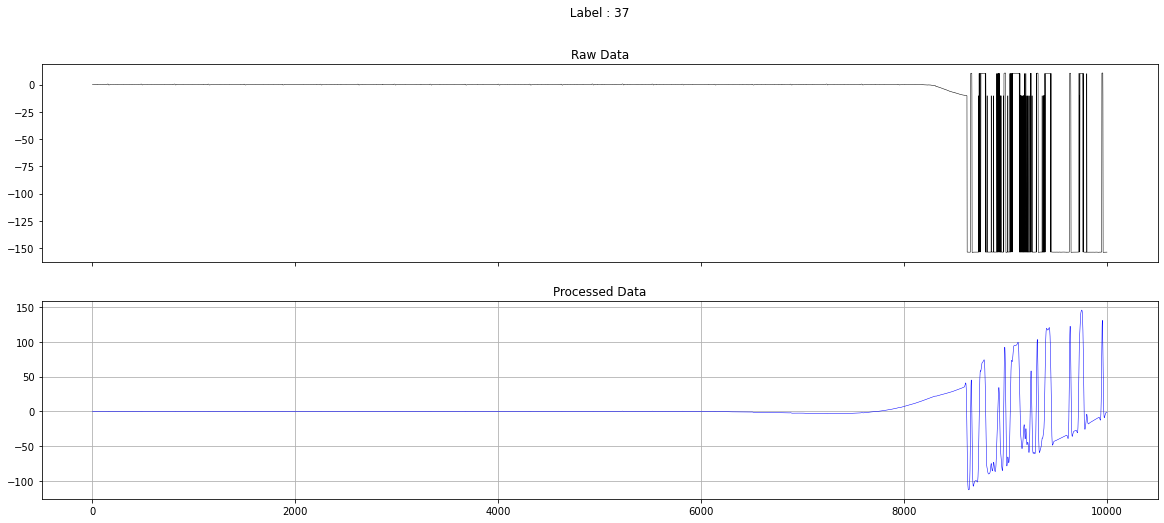

In [356]:
plot_signal(train_df,134)

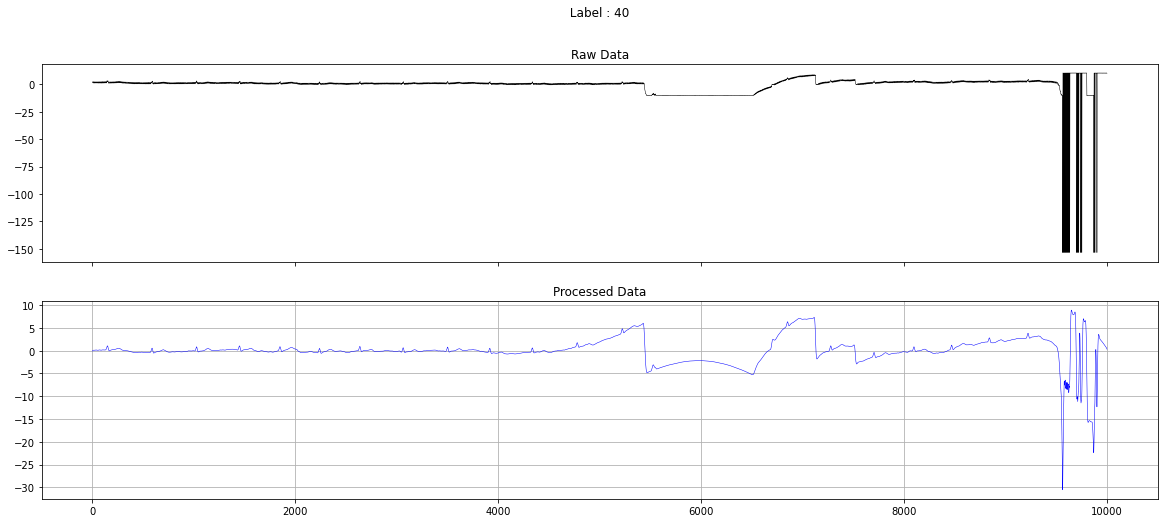

In [357]:
plot_signal(train_df,139)

In [358]:
# I noticed in the visulized data that we have two useless noise data. We should remove these two data to get a better resault.

processed_train_data =  processed_train_data.drop(labels=[134,139], axis=0).copy()

In [442]:
temp = processed_train_data.drop(['label'], axis = 1)
processed_train_data['mean'] = temp.sum(axis = 1)/10000
processed_train_data['var'] = pd.DataFrame.var(temp, axis = 1)
processed_train_data['std'] = pd.DataFrame.std(temp, axis = 1)
processed_train_data['median'] = pd.DataFrame.median(temp, axis = 1)
processed_train_data[processed_train_data['label'] == 1]


,0,1,2,3,4,5,6,7,8,9,...,9995,9996,9997,9998,9999,label,mean,var,std,median
3,-0.074120,-0.041798,-0.010150,0.019583,0.046411,0.069736,0.089403,0.105670,0.119074,0.130229,...,-0.034555,-0.039100,-0.044662,-0.050909,-0.057476,1.0,0.004982,0.025359,0.159246,-0.015287
4,-0.037750,-0.028476,-0.019561,-0.011557,-0.004805,0.000597,0.004766,0.007972,0.010558,0.012852,...,-0.053684,-0.051578,-0.049528,-0.047617,-0.045840,1.0,0.001170,0.008580,0.092627,-0.027018
5,-0.534040,-0.540909,-0.547341,-0.553175,-0.558111,-0.561758,-0.563788,-0.564099,-0.562938,-0.560908,...,-0.017167,-0.010242,-0.001594,0.008434,0.019154,1.0,0.014900,0.105747,0.325187,-0.047979
6,-0.077160,-0.068003,-0.059156,-0.051556,-0.045752,-0.041815,-0.039361,-0.037730,-0.036247,-0.034479,...,0.051193,0.040566,0.027098,0.011608,-0.004972,1.0,0.001625,0.025052,0.158277,0.017876
7,0.065974,0.038283,0.011499,-0.013072,-0.034409,-0.051884,-0.065356,-0.075214,-0.082261,-0.087446,...,0.101731,0.093964,0.085363,0.076405,0.067358,1.0,-0.002439,0.006569,0.081052,-0.024533
8,0.032636,0.020885,0.009416,-0.000906,-0.009554,-0.016485,-0.022079,-0.026938,-0.031646,-0.036527,...,-0.108130,-0.089270,-0.067218,-0.042938,-0.017680,1.0,-0.000606,0.006909,0.083121,-0.022592


In [361]:
# We can find R_peaks in the signal with this function

from scipy.signal import find_peaks, peak_prominences
# noramalize the sample
def find_R_peaks(sample):
    sample = np.asarray(sample)
    sample = (sample - sample.mean(axis=0)) / sample.std(axis=0)
    # finding peaks
    peaks , _ = find_peaks(sample, distance = 300)
    # find prominence 
    prominences = peak_prominences(sample, peaks)[0]
    contour_heights = sample[peaks] - prominences
    return peaks


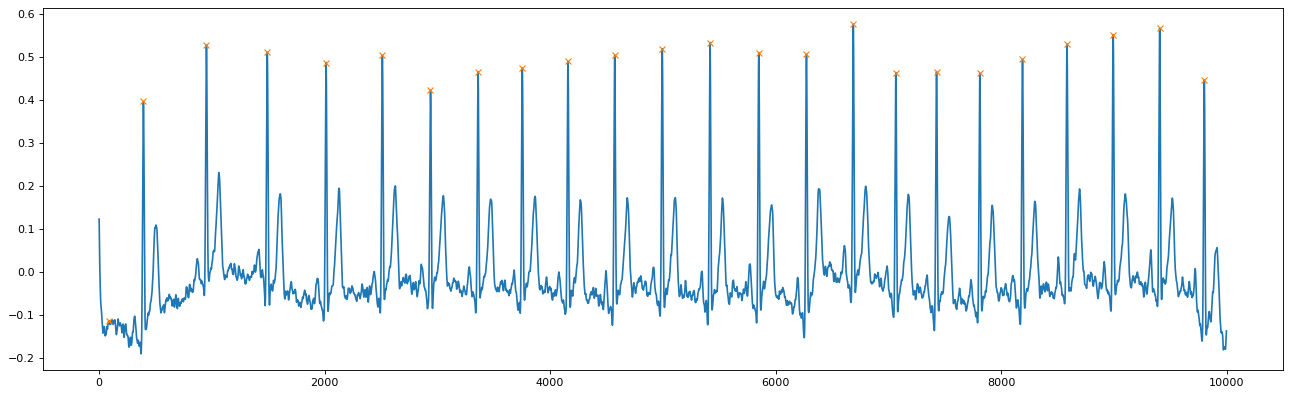

In [362]:
# test the function for one smaple

sample = processed_train_data.iloc[[1]].copy()
sample = sample.drop(['mean', 'var', 'std','median', 'label'], axis = 1)
sample = sample.to_numpy()
sample = sample[0]
# plotting peaks
peaks = find_R_peaks(sample)

plt.figure(figsize=(20, 6), dpi=80)
plt.plot(sample)
plt.plot(peaks, sample[peaks], "x")
plt.show()

In [417]:
# findning all R_peaks in the training data 

a = []
for label in range (41):
    frame = processed_train_data[processed_train_data['label'] == label]
    temp = frame.copy()
    temp = temp.drop(['mean', 'var', 'std','median', 'label'], axis = 1)
    nptemp = temp.to_numpy()
    features = []
    for item in nptemp:
        sample_peaks = find_R_peaks(item)
        for j in range (len(sample_peaks)):
            if (sample_peaks[j]-200 > 0 and sample_peaks[j]+200 <10000):
                features.append([item[i] for i in range (int(sample_peaks[j]-200) ,int(sample_peaks[j]+ 200))]) 
    a.append(features)

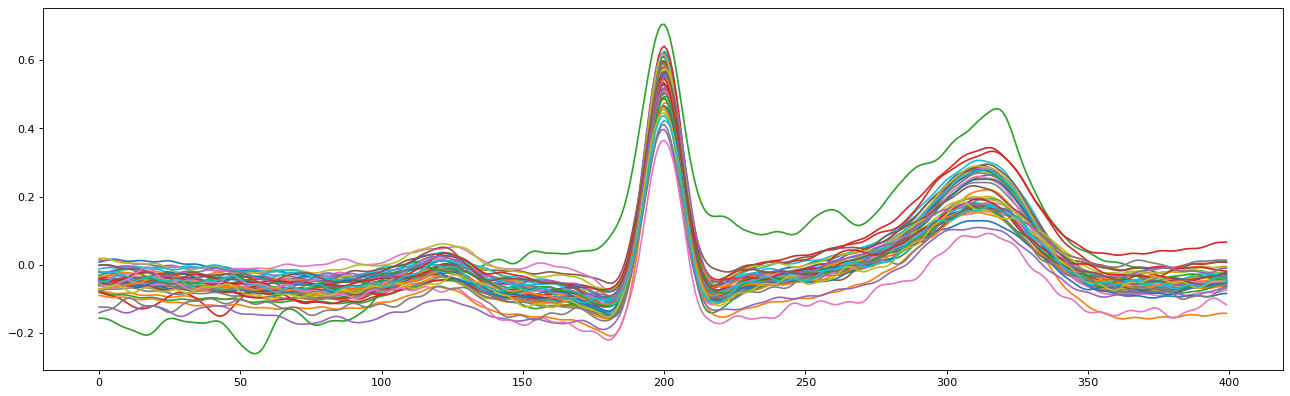

In [418]:
# Plotting the first 50 peaks which belongs to the trainings data with label = 0

from sklearn.svm import SVC


X_train = []
y_train = []
for idx, sublist in enumerate(a):
    for item in sublist:
        X_train.append(item)
        y_train.append(idx)
        

plt.figure(figsize=(20, 6), dpi=80)
for i in range(0,50):
    plt.plot(X_train[i])

plt.show()

In [434]:
# make list of R peaks

temp = processed_train_data.copy()
temp = temp.drop(['mean', 'var', 'std','median', 'label'], axis = 1)
temp = temp.to_numpy()
R_peaks = []
# for item in temp:
#     peaks = find_R_peaks(item)
#     R_peaks = R_peaks.(peaks)
a = np.array(a, dtype=object)
# pca = PCA(n_components=390)
# pca.fit(X_train)
# X_t_train = pca.transform(X_train)
clf = SVC(C= 1000, gamma= .001)
print(len(X_train),len(y_train))
clf.fit(X_train,y_train)
print ('score', clf.score(X_train, y_train))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=20)
print(scores)

3276 3276
score 0.9768009768009768
[0.95731707 0.92073171 0.97560976 0.93902439 0.93292683 0.92682927
 0.95121951 0.89634146 0.93292683 0.90853659 0.92073171 0.95121951
 0.93902439 0.92073171 0.91463415 0.93292683 0.90797546 0.96932515
 0.93865031 0.95092025]


In [436]:
# A function to process the test data which works the same as the function that processes the train data

def process_test_data(df):
    processed_df = pd.DataFrame()
    for i in range (len(df)):
        test = df.iloc[i]
        test = preprocessing.filter_signal(test,cutoff = .2 , sample_rate= 500 ,order= 2 , filtertype='highpass')
        test = preprocessing.filter_signal(test,cutoff = 20 , sample_rate= 500 ,order= 2 , filtertype='lowpass')
        p_test = pd.Series(test)
        processed_df = processed_df.append(p_test, ignore_index=True)
    return processed_df

In [437]:
# creat the data frame of our test data

ptdata = process_test_data(test_df)
processed_test_data = pd.DataFrame(ptdata)
processed_test_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
15,-0.043863,-0.039367,-0.034875,-0.030696,-0.027041,-0.024001,-0.021532,-0.019485,-0.017663,-0.015890,...,-0.062999,-0.059232,-0.055149,-0.050678,-0.045730,-0.040258,-0.034301,-0.028008,-0.021589,-0.015265
16,-0.024309,-0.019150,-0.014184,-0.009576,-0.005503,-0.002125,0.000516,0.002515,0.004015,0.005143,...,0.070442,0.066732,0.062603,0.057828,0.052133,0.045227,0.036874,0.027020,0.015930,0.004241
17,-0.072867,-0.042337,-0.013048,0.013270,0.035186,0.051830,0.063060,0.069465,0.072136,0.072193,...,0.365107,0.359059,0.350515,0.338733,0.323018,0.302817,0.277906,0.248661,0.216237,0.182432
18,-0.005162,-0.005176,-0.005190,-0.005204,-0.005219,-0.005233,-0.005247,-0.005262,-0.005276,-0.005290,...,0.523180,0.538606,0.545095,0.540952,0.525168,0.497639,0.459263,0.411867,0.358042,0.300939
19,-0.002081,-0.005981,-0.009400,-0.012102,-0.014064,-0.015411,-0.016308,-0.016895,-0.017292,-0.017591,...,0.054454,0.052730,0.050798,0.048629,0.046140,0.043241,0.039879,0.036074,0.031947,0.027719


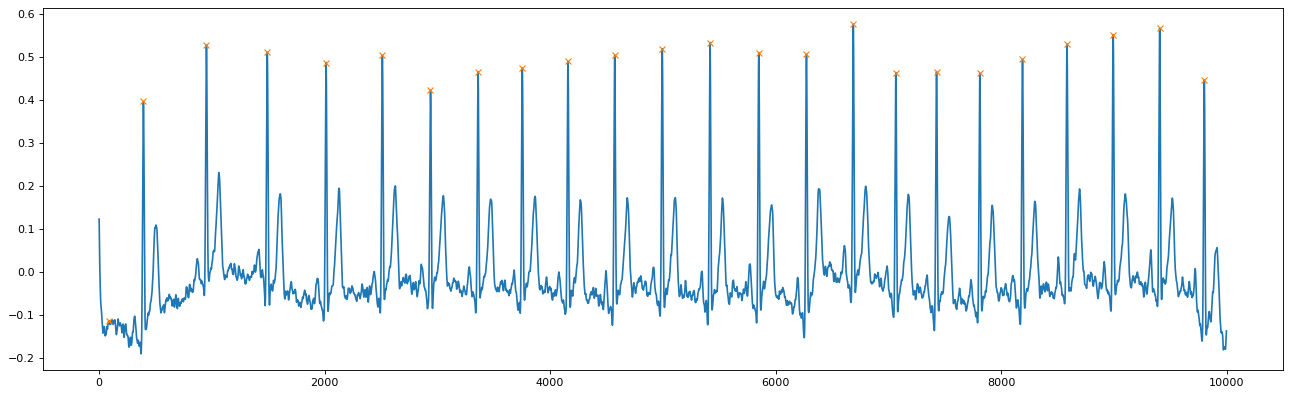

In [438]:
# check test no 10

test_sample = processed_test_data.iloc[[10]].copy()

test_sample = test_sample.to_numpy()
# plotting peaks
peaks = find_R_peaks(sample)

plt.figure(figsize=(20, 6), dpi=80)
plt.plot(sample)
plt.plot(peaks, sample[peaks], "x")
plt.show()

In [439]:
# extracting the featues and testing and finnaly voting the output

count_row = processed_test_data.shape[0]
y_test = []
for k in range (count_row):
    test_features = []
    test_sample = processed_test_data.iloc[[k]].copy()
    test_sample = test_sample.to_numpy()
    test_sample = test_sample[0]
    test_peaks = find_R_peaks(test_sample)
    
    for j in range (len(test_peaks)):
            if (test_peaks[j]-200 > 0 and test_peaks[j]+200 <10000):
                test_features.append([test_sample[i] for i in range (int(test_peaks[j]-200) ,int(test_peaks[j]+ 200))]) 
    output = (clf.predict(test_features))
    output = output.tolist()
    most_common_item = max(output, key = output.count)
    y_test.append(most_common_item)

In [440]:
# RESAULT

y_test

[1, 13, 1, 18, 24, 4, 0, 16, 20, 0, 12, 25, 34, 0, 32, 8, 17, 7, 12, 28]